In [32]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
df=pd.read_csv("C:\\Users\\ROG STRIX\\Desktop\\PDataSets\\hyundi.csv")

In [34]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [35]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6
4859,Tucson,2016,15999,Automatic,11472,Diesel,125,57.6,1.7


In [36]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


In [37]:
df.shape

(4860, 9)

In [38]:
df.dtypes


model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [39]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [40]:
for col in df:
    print(col)

model
year
price
transmission
mileage
fuelType
tax
mpg
engineSize


# Visualizing the data

Text(0.5, 1.0, 'Correlation')

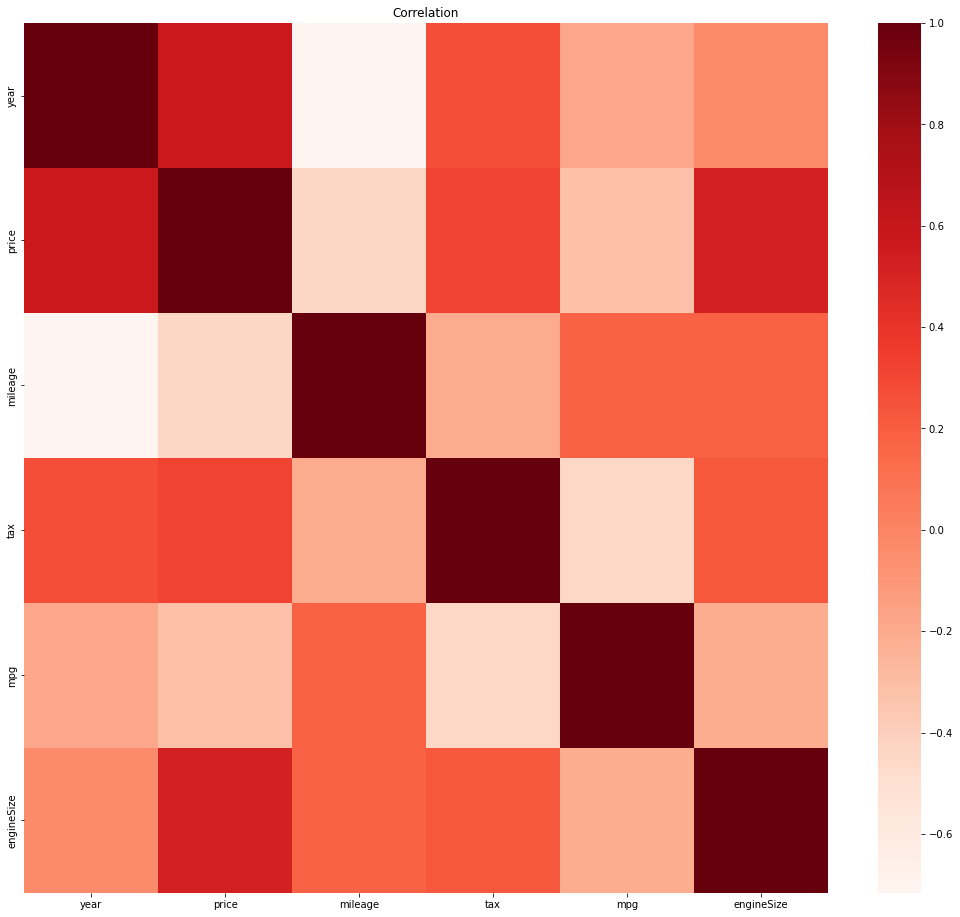

In [41]:
corr=df.corr()
fig=plt.figure(figsize=(18,16))
r=sns.heatmap(corr,cmap='Reds')
r.set_title("Correlation")

In [42]:
corr.sort_values(by=["price"],ascending=False).iloc[0].sort_values(ascending=False)

price         1.000000
year          0.575765
engineSize    0.522384
tax           0.321028
mpg          -0.320355
mileage      -0.443576
Name: price, dtype: float64

In [12]:
corr.sort_values(by=["price"],ascending=False)

,year,price,mileage,tax,mpg,engineSize
price,0.575765,1.000000,-0.443576,0.321028,-0.320355,0.522384
year,1.000000,0.575765,-0.716325,0.271535,-0.180792,-0.034544
engineSize,-0.034544,0.522384,0.178697,0.224927,-0.212200,1.000000
tax,0.271535,0.321028,-0.205910,1.000000,-0.451991,0.224927
mpg,-0.180792,-0.320355,0.181491,-0.451991,1.000000,-0.212200
mileage,-0.716325,-0.443576,1.000000,-0.205910,0.181491,0.178697


<AxesSubplot:xlabel='price', ylabel='Count'>

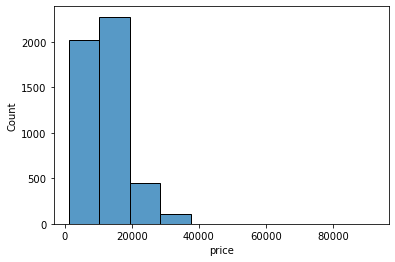

In [13]:
sns.histplot(df['price'],bins=10)

<function matplotlib.pyplot.show(close=None, block=None)>

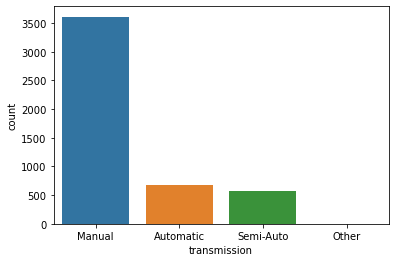

In [14]:
sns.countplot(df['transmission'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

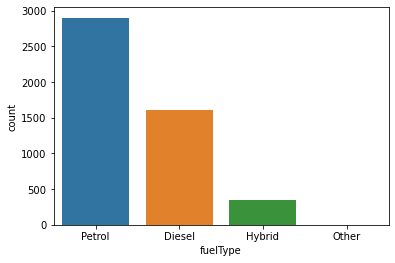

In [15]:
sns.countplot(df['fuelType'])
plt.show

<AxesSubplot:>

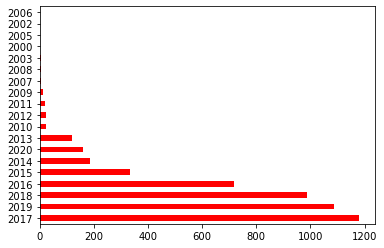

In [16]:
df['year'].value_counts().plot(kind='barh',color = 'red')



<AxesSubplot:>

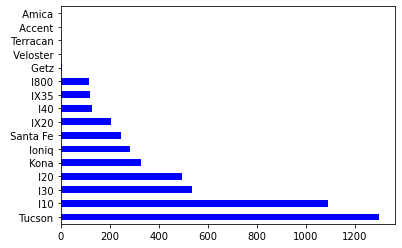

In [17]:
df['model'].value_counts().plot(kind='barh',color = 'blue')


In [18]:
df['model'].value_counts()

 Tucson      1300
 I10         1092
 I30          536
 I20          496
 Kona         328
 Ioniq        284
 Santa Fe     245
 IX20         204
 I40          127
 IX35         118
 I800         117
 Getz           6
 Veloster       3
 Terracan       2
 Accent         1
 Amica          1
Name: model, dtype: int64

In [19]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [20]:
for col in df:
    print(col)
    

model
year
price
transmission
mileage
fuelType
tax
mpg
engineSize


# converting the non numerical values using LabelEncoder

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [44]:
le = LabelEncoder()

In [45]:
df['transmission'] = le.fit_transform(df['transmission'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['model'] = le.fit_transform(df['model'])

# LinearRegression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [47]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['price'],axis=1), 
                                                    df['price'], test_size=0.20, 
                                                    random_state=3)

In [48]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [24]:
accuracy = model.score(x_test, y_test)
print(accuracy*100,'%')

78.05844611420054 %


# DecisionTree

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy',random_state=6)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=6)

In [29]:
y_pred=classifier.predict(x_test)

In [30]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


0.05555555555555555

# Logistics Regression

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [58]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(['price'],axis=1),
                                               df['price'],test_size=0.20,
                                               random_state=7)


In [59]:
logmodel= LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [60]:
predictions = logmodel.predict(x_test)
predictions = logmodel.predict(x_train)
x_test.head()


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
4614,5,2017,0,19367,3,145,51.4,1.4
766,3,2020,1,371,3,150,56.5,1.0
4244,3,2016,1,17272,3,20,61.4,0.0
78,14,2017,1,2236,3,160,44.8,1.6
2402,10,2017,0,8305,1,135,78.5,1.6


In [61]:
accuracy = logmodel.score(x_test,y_test)
print(accuracy*100,'%')

0.720164609053498 %


# SupportVector

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC

In [50]:
scaler=StandardScaler()
x=df.drop('price',axis=1)
y=df['price']

scaler.fit(x)
x_transformed=scaler.transform(x)
#transforming ur data into standard scale
x_train,x_test,y_train,y_test=train_test_split(x_transformed,y,test_size=0.2)

In [51]:
model=SVC()
model.fit(x_train,y_train)
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassificationReport:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:7.79320987654321
Test Set Accuracy:4.218106995884774

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

ClassificationReport:
              precision    recall  f1-score   support

        1990       0.00      0.00      0.00         0
        1995       0.00      0.00      0.00         1
        2000       0.00      0.00      0.00         0
        2395       0.00      0.00      0.00         1
        2495       0.00      0.00      0.00         2
        2699       0.00      0.00      0.00         0
        2799       0.00      0.00      0.00         0
        2995       0.00      0.00      0.00         0
        3095       0.00      0.00      0.00         0
        3290       0.00      0.00      0.00         0
        3295       0.00      0.00      0.00         0
        3490       0.00      0.00      0.00         0
        3695       0.00      0.00      0.00         0
        3